## Treadmill Sales Analysis

### Intro:

Mock Dataset that imitates a survey completed by customers upon purchasing a treadmill.

#### Features:

Product - Model type

Age - Customer age\
Income - Customer Salary\
Education - no. years in Education\
Gender - Customer Gender\
MartialStatus - Martial Status

Fitness - Self Assessed fitness level\
Usage - no. times they expect to Use treadmil per week\
Miles - no. miles they expect to run per week


#### Proposed analysis:
Finding relationships between the model type and the other data - segmenting the market. Such that advertising can be directed in a particular fashion:


### 0) Setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CardioGoodFitness.csv')

In [3]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

### 1) Overall pattern

In [4]:
df.Product.unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [5]:
model_tots = df.groupby('Product')['Product'].count()
# model_tots

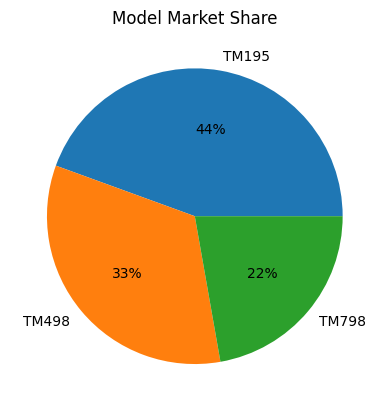

In [6]:
plt.pie(model_tots, labels=['TM195', 'TM498','TM798'], autopct='%.f%%');
plt.title('Model Market Share');

#### Remarks::

* TM195 most popular model, TM 798 least

**Conclusion**

* Focus advertising on TM195

### 2) Analysing Numerics

In [7]:
tm195 = df[df['Product'] == 'TM195']
tm498 = df[df['Product'] == 'TM498']
tm798 = df[df['Product'] == 'TM798']

In [168]:
# display(tm195.describe(), tm498.describe(), tm798.describe())

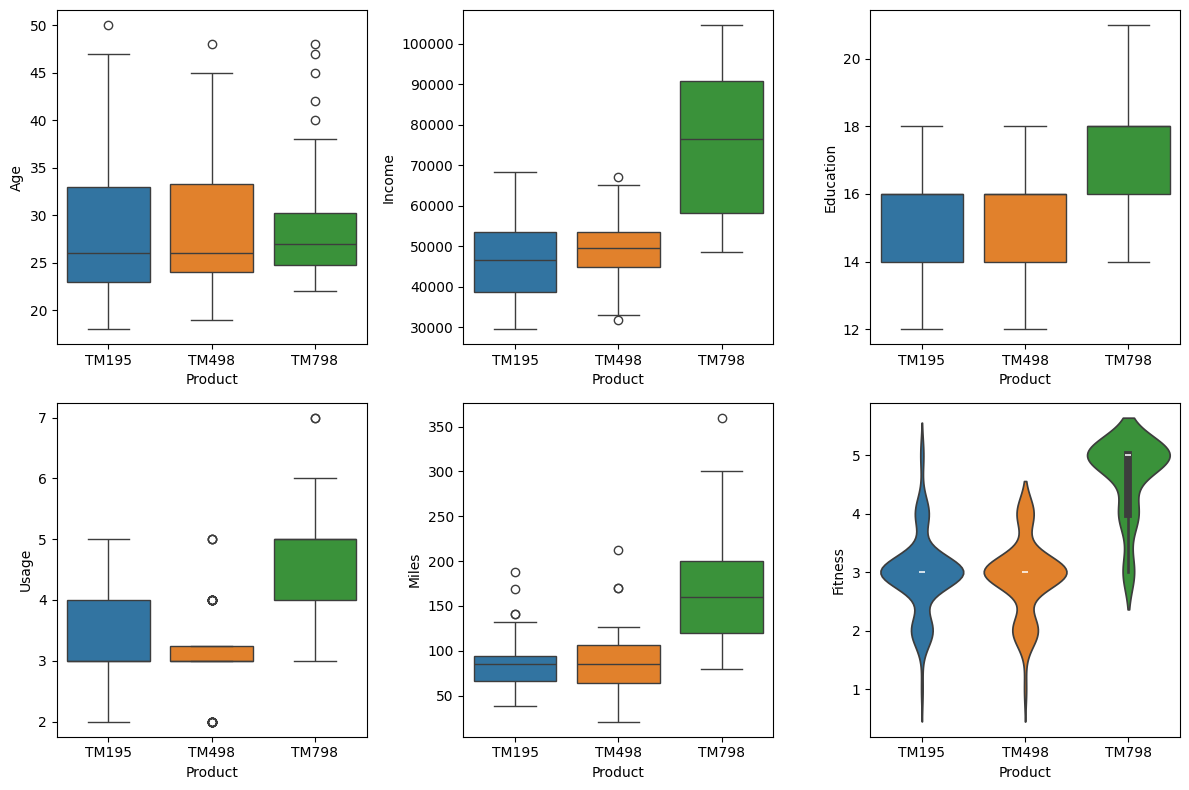

In [8]:
fig, axes = plt.subplots(2,3, figsize=(12,8))

sns.boxplot(ax = axes[0,0], data = df, x = 'Product', y = 'Age', hue = 'Product')
sns.boxplot(ax = axes[0,1], data = df, x = 'Product', y = 'Income', hue = 'Product')
sns.boxplot(ax = axes[0,2], data = df, x = 'Product', y = 'Education', hue = 'Product')
sns.boxplot(ax = axes[1,0], data = df, x = 'Product', y = 'Usage', hue = 'Product')
sns.boxplot(ax = axes[1,1], data = df, x = 'Product', y = 'Miles', hue = 'Product')
sns.violinplot(ax = axes[1,2], data = df, x = 'Product', y = 'Fitness', hue = 'Product')

plt.tight_layout()

#### Remarks::

* Ages between early twenties and mid thirties
* TM798 has a unique user base, those that are wealthier, more educated and who want to use their treadmill more
* TM195 and TM 498 have similar users

**Conclusions**

* Advertise geared towards 20 - 35 year olds
* Have a segmented customer base: can direct advertising accordingly
* 195 and 498 possibly combined into one model - same customer base

### 3) Analysing Binary Categoricals

In [9]:
gender_counts = df.groupby(['Product','Gender'])['Age'].count().unstack()
marital_counts = df.groupby(['Product','MaritalStatus'])['Age'].count().unstack()

<Axes: xlabel='Product'>

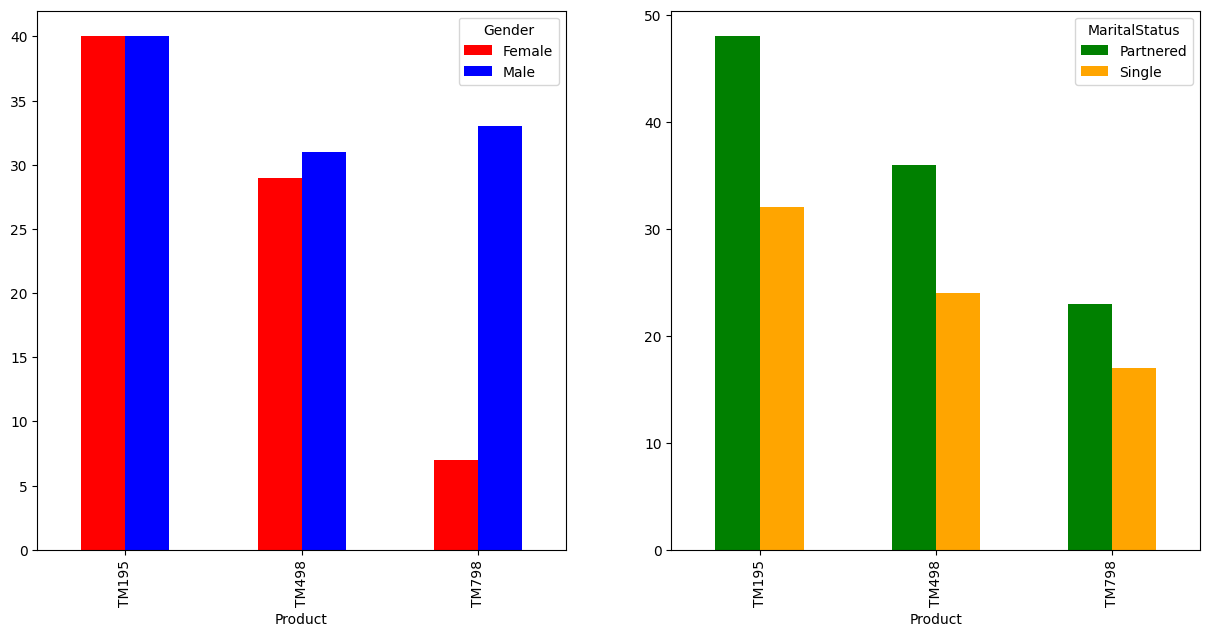

In [10]:
fig, axes = plt.subplots(1,2, figsize = (15,7))
gender_counts.plot(ax = axes[0], kind='bar', stacked=False, color=['red','blue'])
marital_counts.plot(ax=axes[1], kind='bar', stacked=False, color = ['green','orange'])

[Office for National Statistics](https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/bulletins/populationestimatesbymaritalstatusandlivingarrangements/2019)\
*In 2019, just over half of the population (50.4%) were in a legally recognised partnership (50.2% were married with a further 0.2% in a civil partnership). An estimated 35.0% of the population were single (never married or in a civil partnership), with divorced/dissolved civil partnership and widowed/surviving civil partner accounting for 8.2% and 6.5% of the population respectively.*

In [11]:
partner_to_non = 0.504/(1-0.504)
partner_to_non

1.0161290322580645

In [12]:
marital_counts['ratio'] = marital_counts['Partnered']/marital_counts['Single']
marital_counts['above_stat'] = marital_counts['ratio']>partner_to_non
marital_counts

MaritalStatus,Partnered,Single,ratio,above_stat
Product,,,,
TM195,48,32,1.500000,True
TM498,36,24,1.500000,True
TM798,23,17,1.352941,True


#### Remarks:

* Males more likely to buy 798 by far
* Partnered people more likely to buy treadmils across the board

**Conclusions**

* Advertising for 798 geared towards men
* All advertising should be somewhat geared towards people in relationships.

### 4) Further Illustrating Customer demographics with numerics

*inspired by*
[OBrunet](https://obrunet.github.io/data%20science/cardio/)

In [13]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [14]:
mean_data = df.groupby('Product')[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']].mean()
base = mean_data.loc['TM195']
scaled = mean_data/base
scaled

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
TM195,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
TM498,1.012259,1.005265,0.993252,0.978903,1.055057,1.062157
TM798,1.019264,1.152120,1.546559,1.561181,1.625265,2.016005


In [42]:
radar_data = pd.DataFrame(scaled.stack())

radar_data_195 = radar_data.loc['TM195']
radar_data_195.reset_index(inplace = True)
radar_data_195.rename({0:'scaled'},axis=1, inplace=True)

radar_data_498 = radar_data.loc['TM498']
radar_data_498.reset_index(inplace = True)
radar_data_498.rename({0:'scaled'},axis=1, inplace=True)

radar_data_798 = radar_data.loc['TM798']
radar_data_798.reset_index(inplace = True)
radar_data_798.rename({0:'scaled'},axis=1, inplace=True)

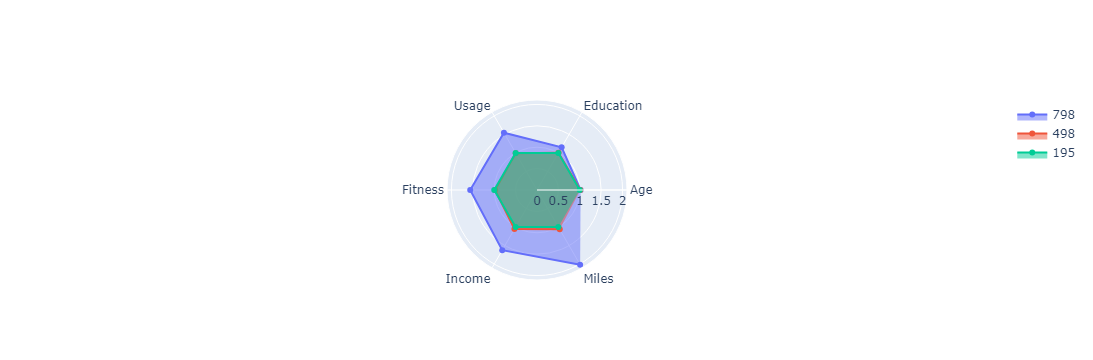

In [101]:
fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=radar_data_798['scaled'], theta=radar_data_798['index'], fill='toself', name='798'))
fig.add_trace(go.Scatterpolar(r=radar_data_498['scaled'], theta=radar_data_498['index'],fill='toself', name='498'))
fig.add_trace(go.Scatterpolar(r=radar_data_195['scaled'], theta=radar_data_195['index'],fill='toself', name='195'))
fig.show()

In [76]:
from sklearn import preprocessing

In [81]:
df.select_dtypes('number').columns

Index(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'], dtype='object')

In [91]:
#mmscaled = 
# MinMaxScaler.fit_transform(df[df.select_dtypes('number').columns])
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[df.select_dtypes('number').columns])
df_scaled = pd.DataFrame(df_scaled, columns = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'])
df_scaled = pd.concat([df['Product'],df_scaled*5],axis=1)
df_scaled = df_scaled.groupby('Product').mean()

In [102]:
radar_data = pd.DataFrame(df_scaled.stack())

radar_data_195 = radar_data.loc['TM195']
radar_data_195.reset_index(inplace = True)
radar_data_195.rename({0:'scaled'},axis=1, inplace=True)

radar_data_498 = radar_data.loc['TM498']
radar_data_498.reset_index(inplace = True)
radar_data_498.rename({0:'scaled'},axis=1, inplace=True)

radar_data_798 = radar_data.loc['TM798']
radar_data_798.reset_index(inplace = True)
radar_data_798.rename({0:'scaled'},axis=1, inplace=True)

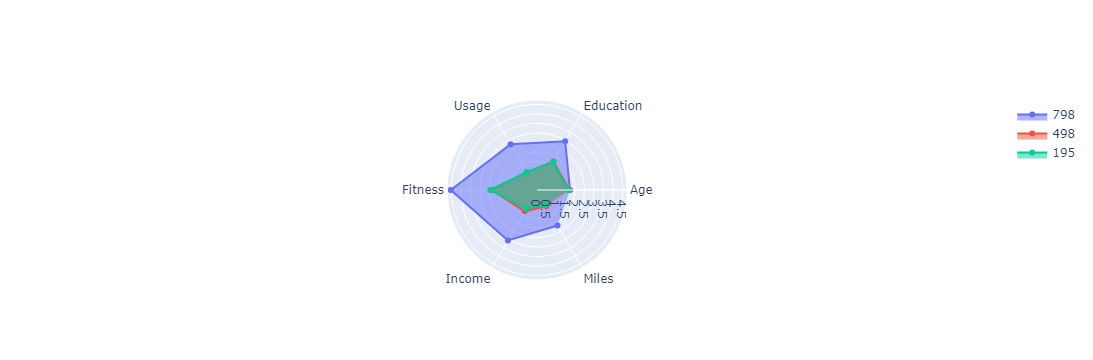

In [103]:
fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=radar_data_798['scaled'], theta=radar_data_798['index'], fill='toself', name='798'))
fig.add_trace(go.Scatterpolar(r=radar_data_498['scaled'], theta=radar_data_498['index'],fill='toself', name='498'))
fig.add_trace(go.Scatterpolar(r=radar_data_195['scaled'], theta=radar_data_195['index'],fill='toself', name='195'))
fig.show()

#### Remarks

* Provides extra clarification that over the whole customer base 498 and 195 have the same appeal
* Brunet provides addditional segmentation by gender splitting, argument for a male or female version of 498 and 195

**Conclusion**

* drop 498 and focus advertising on 195 exclusively

### 5a) Numerics Correlation matrix

In [109]:
import numpy as np

<Axes: >

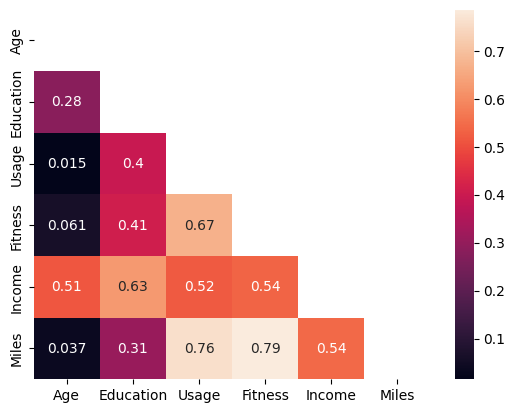

In [127]:
correlation_matrix = df[[ 'Age', 'Education', 'Usage',
       'Fitness', 'Income', 'Miles']].corr()
matrix=np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, mask = matrix, cmap='rocket' )

<Axes: >

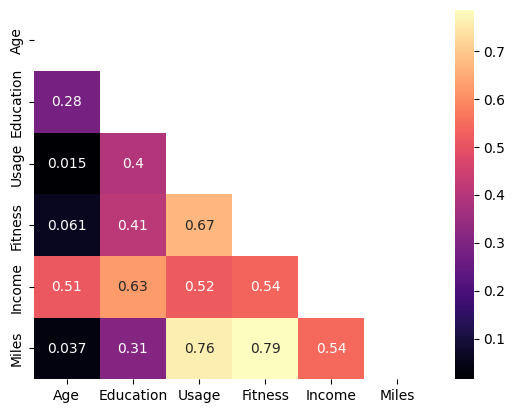

In [128]:
correlation_matrix = df[[ 'Age', 'Education', 'Usage',
       'Fitness', 'Income', 'Miles']].corr()
matrix=np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, mask = matrix, cmap='magma' )

<Axes: >

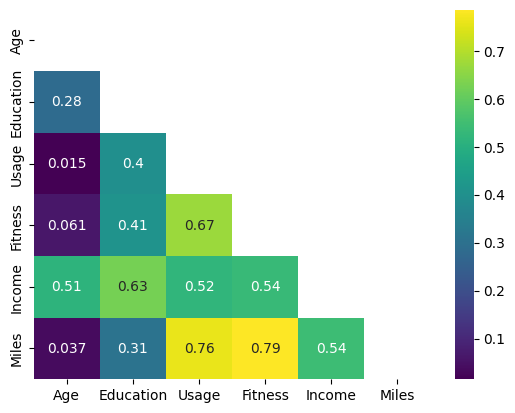

In [125]:
correlation_matrix = df[[ 'Age', 'Education', 'Usage',
       'Fitness', 'Income', 'Miles']].corr()
matrix=np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, mask = matrix, cmap='viridis' )

##### Remarks:

* Income is highly correlated with every feature!
* Expected Miles shows greatest correlation of the group, with usage and fitness

##### appending model indicators

In [156]:
df_correlation = df.copy()
df_correlation['195_indicator'] = df['Product'] == 'TM195'
df_correlation['498_indicator'] = df['Product'] == 'TM498'
df_correlation['798_indicator'] = df['Product'] == 'TM798'
df_correlation.drop(['Product','Gender','MaritalStatus'],inplace = True, axis=1)

<Axes: >

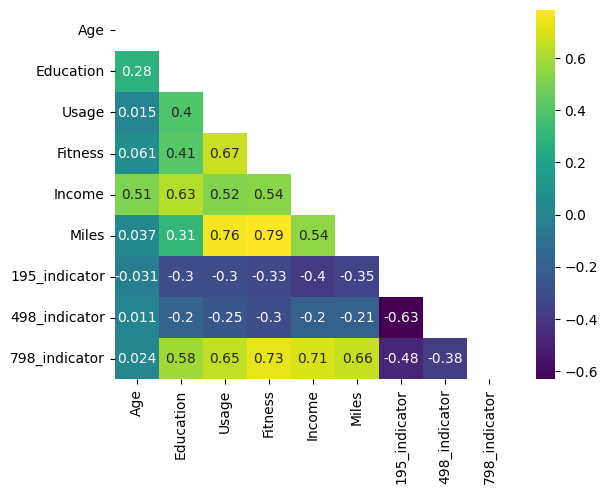

In [159]:
cor_m = df_correlation.corr()
lu = np.triu(cor_m)
# lu
sns.heatmap(cor_m, annot=True, mask = lu, cmap='viridis' )

#### Remarks:

* some nonsense data .e.g correlation between indicators
* qualifies level of correlation between 798 and numeric variables Useful to strengthen arguments
* Age has no bearing on model choice

### 5b) Categorical correlation matrix

In [145]:
df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [150]:
df_encoded = df.copy()
df_encoded = df_encoded.select_dtypes(include='object')
df_encoded['male_indicator'] = df['Gender'] =='Male'
df_encoded['female_indicator'] = df['Gender'] =='Female'
df_encoded['single_indicator'] = df['MaritalStatus'] =='Single'
df_encoded['partnered_indicator'] = df['MaritalStatus'] =='Partnered'
df_encoded['195_indicator'] = df['Product'] == 'TM195'
df_encoded['498_indicator'] = df['Product'] == 'TM498'
df_encoded['798_indicator'] = df['Product'] == 'TM798'
df_encoded.drop(['Product','Gender','MaritalStatus'],axis=1, inplace= True)

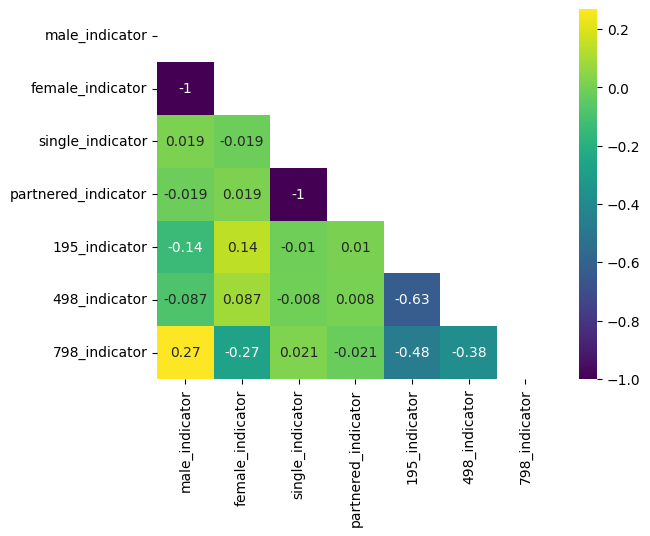

In [161]:
encoded_cor_m = df_encoded.corr()
matrix=np.triu(encoded_cor_m)
sns.heatmap(encoded_cor_m, annot=True, mask=matrix, cmap ='viridis');

#### Remarks:

* male and 798 are most correlated - backs up previous argument
* Interestingly 195 and female correlated - argument for marketing it more towards women
    * keeping 498 and marketing it for men????

### References

*Inspiration*\
[Brunet](https://obrunet.github.io/data%20science/cardio/)

*External Stats*\
[Office for National Statistics](https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/bulletins/populationestimatesbymaritalstatusandlivingarrangements/2019)

*Programming Help*\
[piechart](https://www.statology.org/seaborn-pie-chart/)\
[subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)\
[pd_manipulation](https://stackoverflow.com/questions/22233488/pandas-drop-a-level-from-a-multi-level-column-index)\
[groupedbar](https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/)\
[Radarplot](https://plotly.com/python/radar-chart/)\
[masking correlation matrix](https://stackoverflow.com/questions/57414771/how-to-plot-only-the-lower-triangle-of-a-seaborn-heatmap)\
[colourmaps](https://seaborn.pydata.org/tutorial/color_palettes.html)
